# ENCS5343 :Computer Vision
<h4>Course Project: <br> Arabic Handwritten Text Identification Using Deep Learning </h4>

<h4> <b>Mohammed Abed Alkareem - 1210708</b> </h4>

# Download Dataset

Dataset Link: https://data.mendeley.com/datasets/2h76672znt/1/files/9031138a-b812-433e-a704-8acb1707936e

<p>The dataset contains 65 different Arabic alphabets (with variations on begin, middle, end and regular alphabets), 10 different Arabic words (that encompass all Arabic alphabets) and 3 different paragraphs. The dataset was collected anonymously from 82 different users. Each user was asked to write each alphabet and word 10 times. A userid uniquely but anonymously identifies the writer of each alphabet, word and paragraph. In total, the dataset consists of 53199 alphabet images, 8144 word images and 241 paragraph images.</p>

- The file **"isolated_words_per_user.zip"** contains 8144 Arabic words organized into one folder per user

In [1]:
# download the dataset from the Mendeley Data
!wget https://data.mendeley.com/public-files/datasets/2h76672znt/files/9031138a-b812-433e-a704-8acb1707936e/file_downloaded -O isolated_words_per_user.zip

--2024-12-25 10:23:26--  https://data.mendeley.com/public-files/datasets/2h76672znt/files/9031138a-b812-433e-a704-8acb1707936e/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/56076a80-b848-4c11-bc65-fa1a0423c35e [following]
--2024-12-25 10:23:27--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/56076a80-b848-4c11-bc65-fa1a0423c35e
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.64.192, 3.5.67.153, 3.5.68.25, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.64.192|:443... conne

In [2]:
# unzip the dataset
import zipfile

with zipfile.ZipFile('isolated_words_per_user.zip', 'r') as zip_ref:
    zip_ref.extractall('isolated_words_per_user')

# import required libraries

In [3]:
from models import *
from functions import *
from plot import *

import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

# Data Loading

## Define the transformation

In [4]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)), # Resize the image to 224x224 because there is no standard size for the images in the dataset
        transforms.ToTensor(),
        #make gray scale with 1 channel
        transforms.Grayscale(num_output_channels=1),
     transforms.Normalize((0.5,), (0.5,))])


# Define data augmentation for training !!!!!! change it to the one you want to use
aug_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Randomly change brightness, contrast, saturation, and hue
    transforms.RandomRotation(30),      # Randomly rotate images up to 30 degrees
    transforms.ToTensor(),              # Convert to tensor
    transforms.Grayscale(num_output_channels=1), #make gray scale with 1 channel
    transforms.Normalize((0.5,), (0.5,))  # Normalize
])


In [5]:
# Load the dataset
dataset = torchvision.datasets.ImageFolder(root='isolated_words_per_user/isolated_words_per_user', transform=transform)

# Load the augmented dataset
augmented_dataset = torchvision.datasets.ImageFolder(root='isolated_words_per_user/isolated_words_per_user', transform=aug_transform)



# Split the data into training , validation and test sets

In [6]:
# Split the dataset into training and testing
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

#split the training to training and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])


train_aug_size = int(0.8 * len(augmented_dataset))
test_aug_size = len(augmented_dataset) - train_aug_size
train_augmented_dataset, test_augmented_dataset = torch.utils.data.random_split(augmented_dataset, [train_aug_size, test_aug_size])

#split the training to training and validation
train_aug_size = int(0.8 * len(train_augmented_dataset))
val_aug_size = len(train_augmented_dataset) - train_aug_size
train_augmented_dataset, val_augmented_dataset = torch.utils.data.random_split(train_augmented_dataset, [train_aug_size, val_aug_size])


In [7]:
#classes are directory names in the dataset
classes = dataset.classes

In [8]:
classes

['user001',
 'user002',
 'user003',
 'user004',
 'user005',
 'user006',
 'user007',
 'user008',
 'user009',
 'user010',
 'user011',
 'user012',
 'user013',
 'user014',
 'user015',
 'user016',
 'user017',
 'user018',
 'user019',
 'user020',
 'user021',
 'user022',
 'user023',
 'user024',
 'user025',
 'user026',
 'user027',
 'user028',
 'user029',
 'user030',
 'user031',
 'user032',
 'user033',
 'user034',
 'user035',
 'user036',
 'user037',
 'user038',
 'user039',
 'user040',
 'user041',
 'user042',
 'user043',
 'user044',
 'user045',
 'user046',
 'user047',
 'user048',
 'user049',
 'user050',
 'user051',
 'user052',
 'user053',
 'user054',
 'user055',
 'user056',
 'user057',
 'user058',
 'user059',
 'user060',
 'user061',
 'user062',
 'user063',
 'user064',
 'user065',
 'user066',
 'user067',
 'user068',
 'user069',
 'user070',
 'user071',
 'user072',
 'user073',
 'user074',
 'user075',
 'user076',
 'user077',
 'user078',
 'user079',
 'user080',
 'user081',
 'user082']

## Create the data loaders

In [9]:
#define data loaders

batch_size = 256

train_loader = torch.utils.data.DataLoader(
    train_dataset,
      batch_size=batch_size,
        shuffle=True)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
      batch_size=batch_size,
        shuffle=False)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
      batch_size=batch_size,
        shuffle=False)

train_aug_loader = torch.utils.data.DataLoader(
    train_augmented_dataset,
      batch_size=batch_size,
        shuffle=True)

val_aug_loader = torch.utils.data.DataLoader(
    val_augmented_dataset,
      batch_size=batch_size,
        shuffle=False)

test_aug_loader = torch.utils.data.DataLoader(
    test_augmented_dataset,
      batch_size=batch_size,
        shuffle=False)


In [10]:
print(f'Total batches in trainloader: {len(train_loader)}')
print(f'Total batches in valloader: {len(val_loader)}')
print(f'Total batches in testloader: {len(test_loader)}')


Total batches in trainloader: 21
Total batches in valloader: 6
Total batches in testloader: 7


In [11]:
#print shape of one image
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"batch shape: {images.shape}")
print(f"image shape: {images[0].shape}")

batch shape: torch.Size([256, 1, 224, 224])
image shape: torch.Size([1, 224, 224])


## Show Sample Images

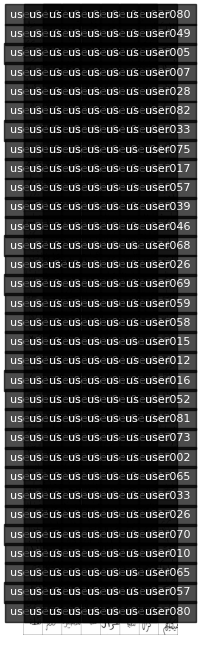

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

# Functions to show an image
def imshow(img, title):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title(title)

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid of images
nrow = 8  # Number of images per row
grid_img = torchvision.utils.make_grid(images, nrow=nrow, padding=2)
grid_npimg = grid_img.numpy().transpose((1, 2, 0))  # Prepare the image grid for display

# Calculate image dimensions
img_height = grid_npimg.shape[0] // (len(images) // nrow + (1 if len(images) % nrow > 0 else 0))
img_width = grid_npimg.shape[1] // nrow

# Display the grid with class labels
plt.figure(figsize=(12, 8))
plt.imshow(grid_npimg)
plt.axis('off')

# Add class labels on top of each image
for i in range(len(images)):
    row = i // nrow
    col = i % nrow
    label = classes[labels[i]]
    x = col * img_width + img_width // 2  # Center horizontally in the image
    y = row * img_height + 10            # Place slightly above the image
    plt.text(x, y, label, ha='center', va='bottom', fontsize=8, color='white',
             bbox=dict(facecolor='black', alpha=0.7))

plt.show()


# Task 1:Build and train a custom CNN network.

## Model 1:
CNN model with 2 convolutional layers and 2 fully connected layers

In [13]:
net = NetCNN_1()
net

NetCNN_1(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=82, bias=True)
)

In [14]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 5.072, Validation Loss: 4.402
Epoch 1 Training Accuracy: 0.015, Validation Accuracy: 0.015
Epoch 2
Epoch 2 Training Loss: 4.264, Validation Loss: 4.111
Epoch 2 Training Accuracy: 0.046, Validation Accuracy: 0.067
Epoch 3
Epoch 3 Training Loss: 3.516, Validation Loss: 3.721
Epoch 3 Training Accuracy: 0.182, Validation Accuracy: 0.147
Epoch 4
Epoch 4 Training Loss: 2.449, Validation Loss: 3.669
Epoch 4 Training Accuracy: 0.400, Validation Accuracy: 0.184
Epoch 5
Epoch 5 Training Loss: 1.503, Validation Loss: 3.856
Epoch 5 Training Accuracy: 0.609, Validation Accuracy: 0.198
Epoch 6
Epoch 6 Training Loss: 0.783, Validation Loss: 4.411
Epoch 6 Training Accuracy: 0.799, Validation Accuracy: 0.206
Epoch 7
Epoch 7 Training Loss: 0.325, Validation Loss: 5.054
Epoch 7 Training Accuracy: 0.927, Validation Accuracy: 0.220
Epoch 8
Epoch 8 Training Loss: 0.118, Validation Loss: 5.655
Epoch 8 Training Accuracy: 0.981, Validation Accuracy: 0.223
Epoch 9
Epoch 9 Training

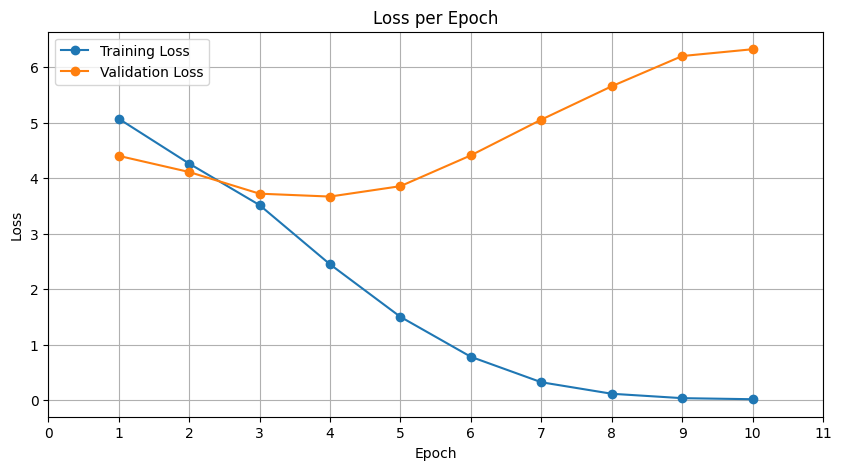

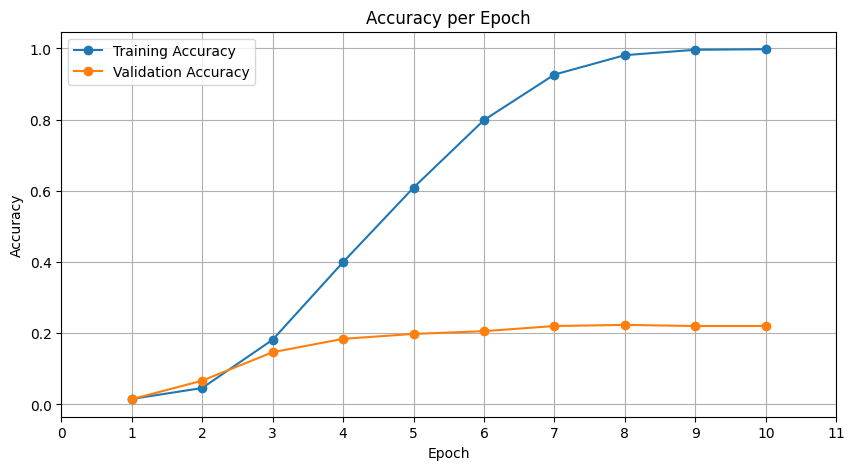

In [15]:
plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

In [16]:
net = NetCNN_1()
net

NetCNN_1(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=82, bias=True)
)

In [17]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 21.223, Validation Loss: 4.400
Epoch 1 Training Accuracy: 0.012, Validation Accuracy: 0.013
Epoch 2
Epoch 2 Training Loss: 4.175, Validation Loss: 4.059
Epoch 2 Training Accuracy: 0.045, Validation Accuracy: 0.055
Epoch 3
Epoch 3 Training Loss: 3.362, Validation Loss: 4.266
Epoch 3 Training Accuracy: 0.208, Validation Accuracy: 0.082
Epoch 4
Epoch 4 Training Loss: 2.168, Validation Loss: 4.993
Epoch 4 Training Accuracy: 0.463, Validation Accuracy: 0.110
Epoch 5
Epoch 5 Training Loss: 1.198, Validation Loss: 6.917
Epoch 5 Training Accuracy: 0.683, Validation Accuracy: 0.089
Epoch 6
Epoch 6 Training Loss: 0.703, Validation Loss: 8.695
Epoch 6 Training Accuracy: 0.823, Validation Accuracy: 0.095
Epoch 7
Epoch 7 Training Loss: 0.452, Validation Loss: 9.871
Epoch 7 Training Accuracy: 0.888, Validation Accuracy: 0.096
Epoch 8
Epoch 8 Training Loss: 0.331, Validation Loss: 10.057
Epoch 8 Training Accuracy: 0.922, Validation Accuracy: 0.102
Early stopping due to 

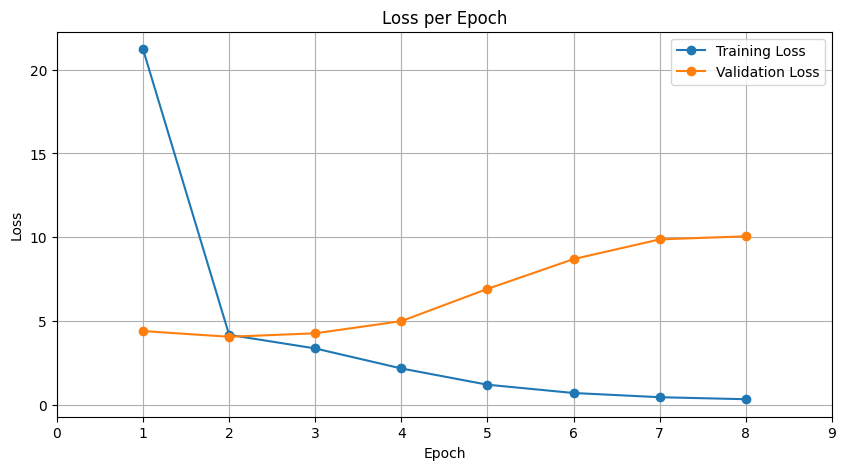

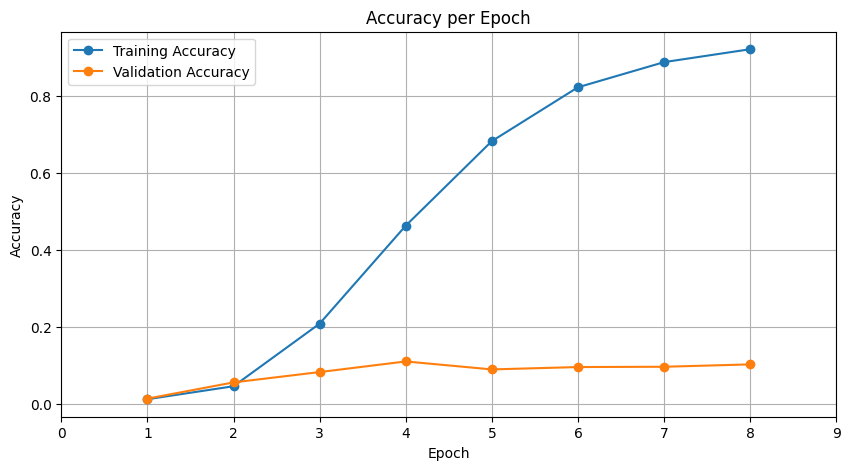

In [18]:
plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 2:

In [19]:
net = NetCNN_2()

net

NetCNN_2(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=43264, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=82, bias=True)
)

In [20]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 4.954, Validation Loss: 4.385
Epoch 1 Training Accuracy: 0.035, Validation Accuracy: 0.033
Epoch 2
Epoch 2 Training Loss: 4.140, Validation Loss: 4.073
Epoch 2 Training Accuracy: 0.075, Validation Accuracy: 0.083
Epoch 3
Epoch 3 Training Loss: 3.486, Validation Loss: 3.866
Epoch 3 Training Accuracy: 0.172, Validation Accuracy: 0.135
Epoch 4
Epoch 4 Training Loss: 2.675, Validation Loss: 4.072
Epoch 4 Training Accuracy: 0.331, Validation Accuracy: 0.153
Epoch 5
Epoch 5 Training Loss: 1.654, Validation Loss: 4.372
Epoch 5 Training Accuracy: 0.566, Validation Accuracy: 0.170
Epoch 6
Epoch 6 Training Loss: 0.816, Validation Loss: 5.079
Epoch 6 Training Accuracy: 0.771, Validation Accuracy: 0.183
Epoch 7
Epoch 7 Training Loss: 0.354, Validation Loss: 6.755
Epoch 7 Training Accuracy: 0.900, Validation Accuracy: 0.197
Epoch 8
Epoch 8 Training Loss: 0.145, Validation Loss: 7.316
Epoch 8 Training Accuracy: 0.962, Validation Accuracy: 0.194
Epoch 9
Epoch 9 Training

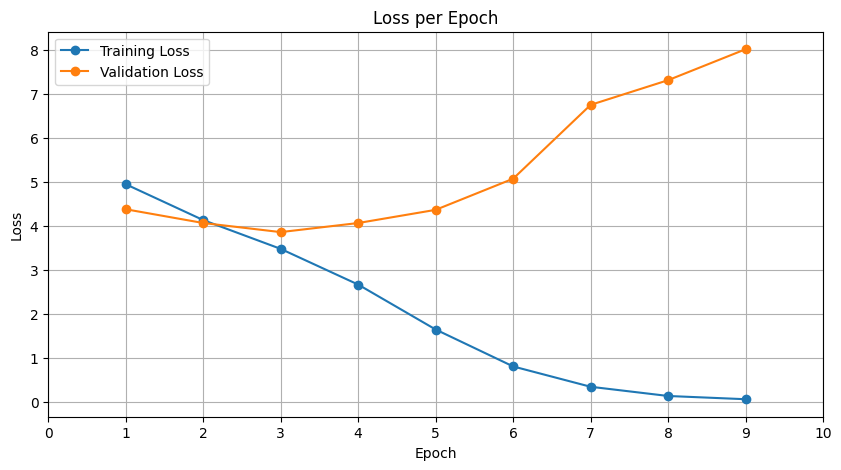

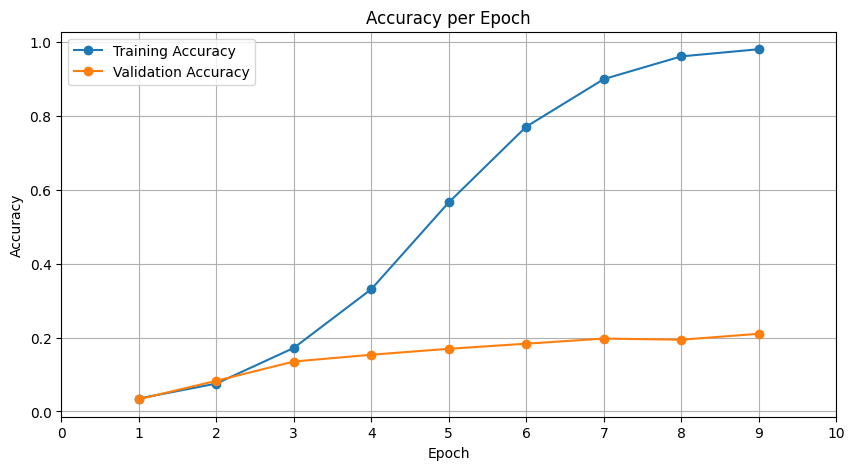

In [21]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

In [22]:
net = NetCNN_2()

net

NetCNN_2(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=43264, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=82, bias=True)
)

In [23]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 32.020, Validation Loss: 4.413
Epoch 1 Training Accuracy: 0.015, Validation Accuracy: 0.006
Epoch 2
Epoch 2 Training Loss: 4.412, Validation Loss: 4.415
Epoch 2 Training Accuracy: 0.014, Validation Accuracy: 0.006
Epoch 3
Epoch 3 Training Loss: 4.404, Validation Loss: 4.416
Epoch 3 Training Accuracy: 0.014, Validation Accuracy: 0.006
Epoch 4
Epoch 4 Training Loss: 4.407, Validation Loss: 4.418
Epoch 4 Training Accuracy: 0.014, Validation Accuracy: 0.006
Epoch 5
Epoch 5 Training Loss: 4.404, Validation Loss: 4.418
Epoch 5 Training Accuracy: 0.014, Validation Accuracy: 0.006
Epoch 6
Epoch 6 Training Loss: 4.403, Validation Loss: 4.419
Epoch 6 Training Accuracy: 0.014, Validation Accuracy: 0.006
Epoch 7
Epoch 7 Training Loss: 4.404, Validation Loss: 4.421
Epoch 7 Training Accuracy: 0.012, Validation Accuracy: 0.006
Early stopping due to validation loss increasing for 6 consecutive epochs at epoch 7
Finished Training


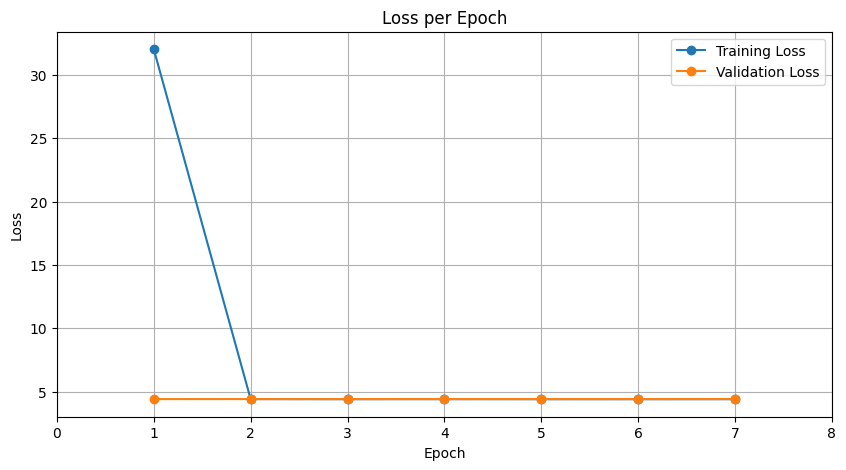

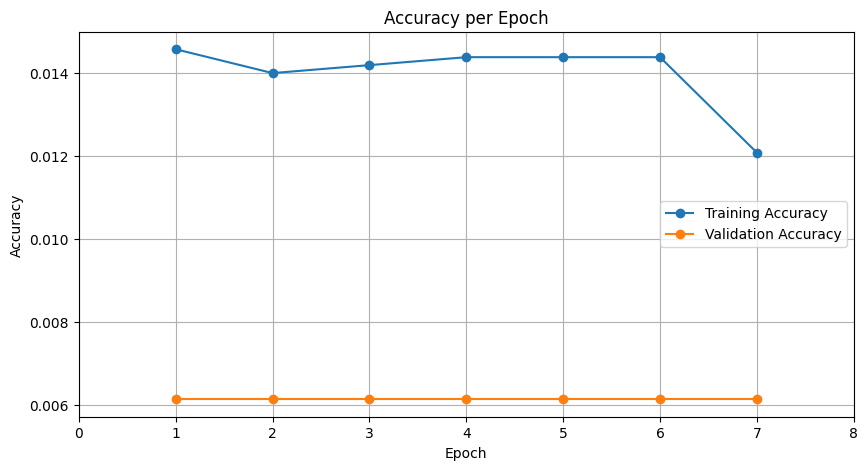

In [24]:
plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 3:

In [25]:

net = NetCNN_3()

net

NetCNN_3(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (dropout): Dropout(p=0.4, inplace=False)
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=64, out_features=82, bias=True)
)

In [26]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 4.403, Validation Loss: 4.413
Epoch 1 Training Accuracy: 0.014, Validation Accuracy: 0.021
Epoch 2
Epoch 2 Training Loss: 4.380, Validation Loss: 4.341
Epoch 2 Training Accuracy: 0.019, Validation Accuracy: 0.014
Epoch 3
Epoch 3 Training Loss: 4.282, Validation Loss: 4.263
Epoch 3 Training Accuracy: 0.024, Validation Accuracy: 0.032
Epoch 4
Epoch 4 Training Loss: 4.125, Validation Loss: 4.125
Epoch 4 Training Accuracy: 0.034, Validation Accuracy: 0.024
Epoch 5
Epoch 5 Training Loss: 4.000, Validation Loss: 4.094
Epoch 5 Training Accuracy: 0.038, Validation Accuracy: 0.035
Epoch 6
Epoch 6 Training Loss: 3.952, Validation Loss: 4.055
Epoch 6 Training Accuracy: 0.040, Validation Accuracy: 0.035
Epoch 7
Epoch 7 Training Loss: 3.915, Validation Loss: 4.026
Epoch 7 Training Accuracy: 0.040, Validation Accuracy: 0.032
Epoch 8
Epoch 8 Training Loss: 3.908, Validation Loss: 4.043
Epoch 8 Training Accuracy: 0.039, Validation Accuracy: 0.032
Epoch 9
Epoch 9 Training

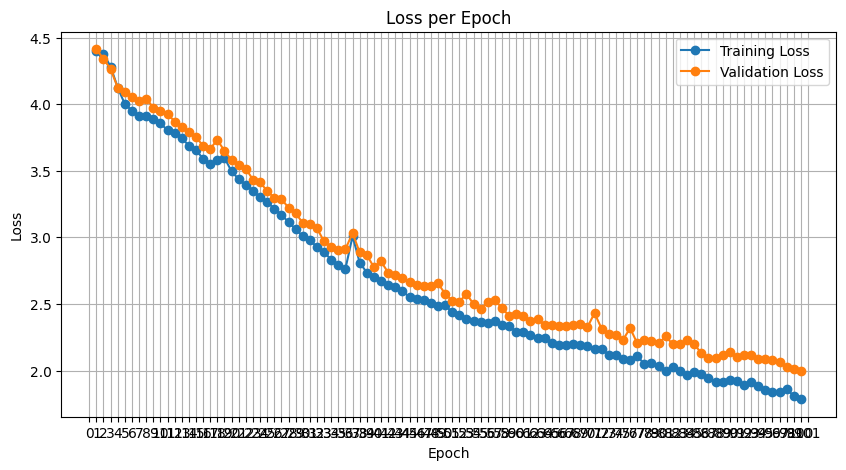

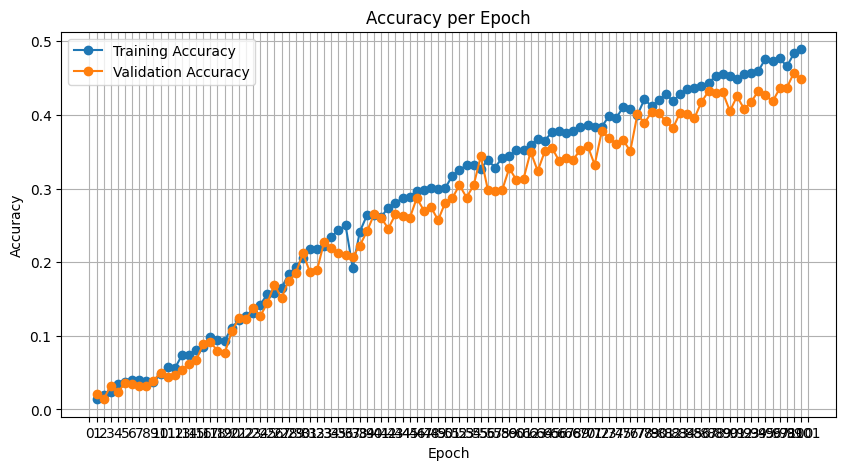

In [27]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

In [33]:

net = NetCNN_3()

net

NetCNN_3(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (dropout): Dropout(p=0.4, inplace=False)
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=64, out_features=82, bias=True)
)

In [34]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.001, weight_decay=1e-2)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 4.399, Validation Loss: 4.423
Epoch 1 Training Accuracy: 0.015, Validation Accuracy: 0.007
Epoch 2
Epoch 2 Training Loss: 4.372, Validation Loss: 4.360
Epoch 2 Training Accuracy: 0.019, Validation Accuracy: 0.014
Epoch 3
Epoch 3 Training Loss: 4.298, Validation Loss: 4.295
Epoch 3 Training Accuracy: 0.021, Validation Accuracy: 0.018
Epoch 4
Epoch 4 Training Loss: 4.162, Validation Loss: 4.189
Epoch 4 Training Accuracy: 0.034, Validation Accuracy: 0.035
Epoch 5
Epoch 5 Training Loss: 4.031, Validation Loss: 4.109
Epoch 5 Training Accuracy: 0.035, Validation Accuracy: 0.043
Epoch 6
Epoch 6 Training Loss: 3.936, Validation Loss: 4.005
Epoch 6 Training Accuracy: 0.050, Validation Accuracy: 0.056
Epoch 7
Epoch 7 Training Loss: 3.859, Validation Loss: 3.917
Epoch 7 Training Accuracy: 0.058, Validation Accuracy: 0.058
Epoch 8
Epoch 8 Training Loss: 3.757, Validation Loss: 3.828
Epoch 8 Training Accuracy: 0.065, Validation Accuracy: 0.064
Epoch 9
Epoch 9 Training

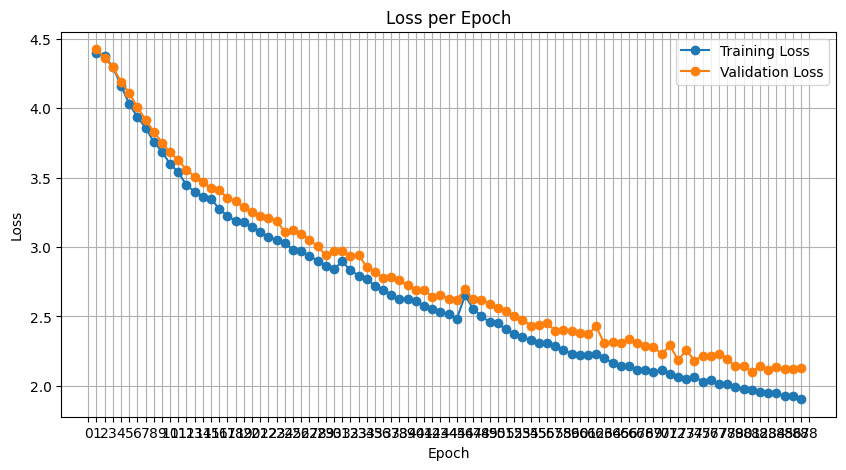

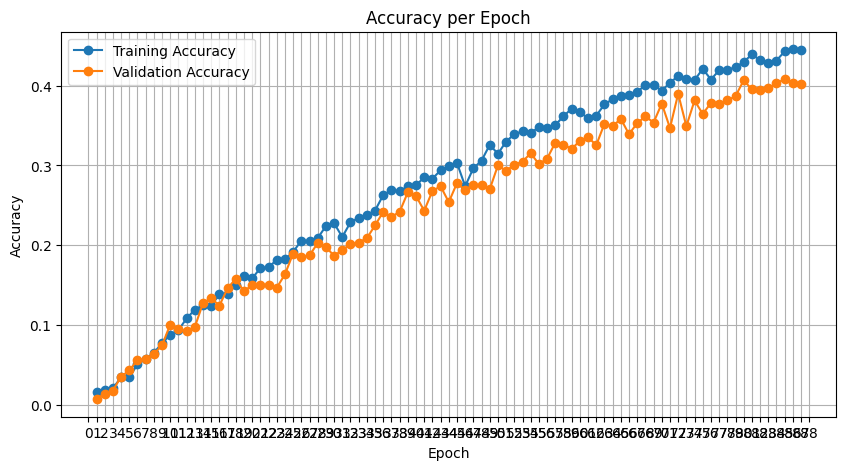

In [35]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 4:

In [ ]:
net = NetCNN_4()

net


NetCNN_4(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=128, out_features=82, bias=True)
)

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 4.370, Validation Loss: 4.412
Epoch 1 Training Accuracy: 0.022, Validation Accuracy: 0.008
Epoch 2
Epoch 2 Training Loss: 4.313, Validation Loss: 4.237
Epoch 2 Training Accuracy: 0.029, Validation Accuracy: 0.023
Epoch 3
Epoch 3 Training Loss: 4.122, Validation Loss: 4.033
Epoch 3 Training Accuracy: 0.038, Validation Accuracy: 0.050
Epoch 4
Epoch 4 Training Loss: 4.006, Validation Loss: 3.978
Epoch 4 Training Accuracy: 0.053, Validation Accuracy: 0.038
Epoch 5
Epoch 5 Training Loss: 3.918, Validation Loss: 3.874
Epoch 5 Training Accuracy: 0.052, Validation Accuracy: 0.068
Epoch 6
Epoch 6 Training Loss: 3.832, Validation Loss: 3.787
Epoch 6 Training Accuracy: 0.065, Validation Accuracy: 0.054
Epoch 7
Epoch 7 Training Loss: 3.748, Validation Loss: 3.686
Epoch 7 Training Accuracy: 0.084, Validation Accuracy: 0.075
Epoch 8
Epoch 8 Training Loss: 3.634, Validation Loss: 3.617
Epoch 8 Training Accuracy: 0.097, Validation Accuracy: 0.104
Epoch 9
Epoch 9 Training

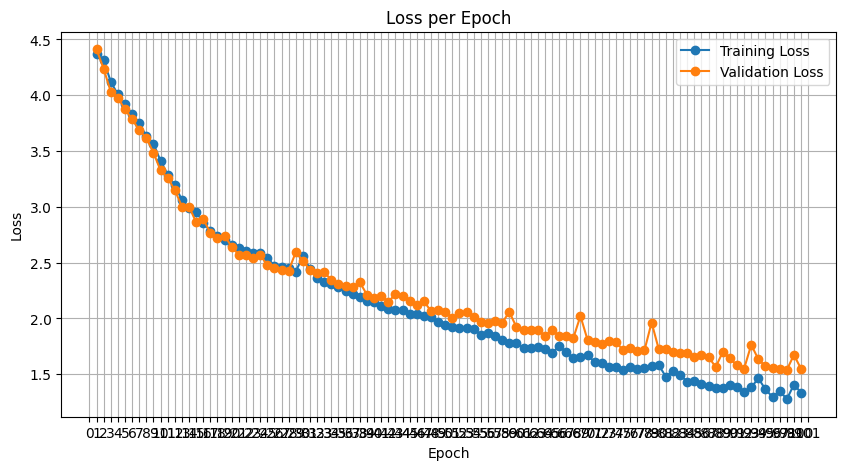

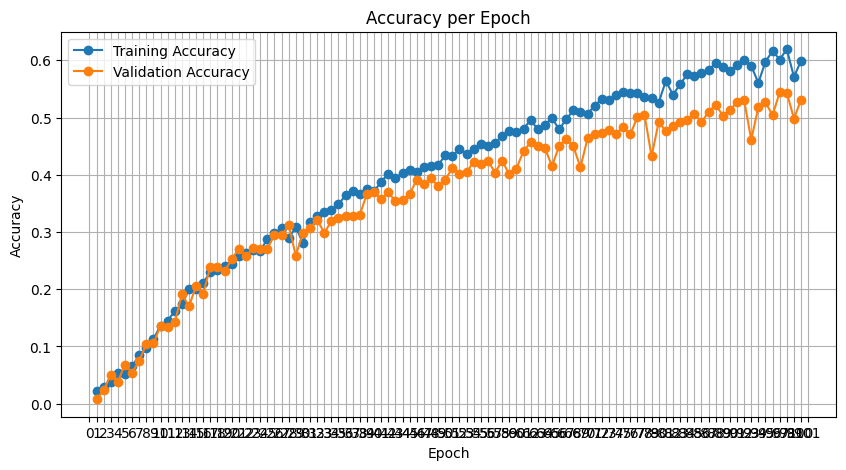

In [ ]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 5:

In [ ]:

net = NetCNN_5()

net

NetCNN_5(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): AvgPool2d(kernel_size=3, stride=1, padding=1)
  (fc1): Linear(in_features=401408, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=82, bias=True)
)

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)

Epoch 1
Epoch 1 Training Loss: 67.752, Validation Loss: 8.700
Epoch 1 Training Accuracy: 0.024, Validation Accuracy: 0.021
Epoch 2
Epoch 2 Training Loss: 4.906, Validation Loss: 4.383
Epoch 2 Training Accuracy: 0.039, Validation Accuracy: 0.035
Epoch 3
Epoch 3 Training Loss: 4.254, Validation Loss: 3.973
Epoch 3 Training Accuracy: 0.050, Validation Accuracy: 0.074
Epoch 4
Epoch 4 Training Loss: 3.421, Validation Loss: 3.262
Epoch 4 Training Accuracy: 0.178, Validation Accuracy: 0.189
Epoch 5
Epoch 5 Training Loss: 2.502, Validation Loss: 3.061
Epoch 5 Training Accuracy: 0.342, Validation Accuracy: 0.241
Epoch 6
Epoch 6 Training Loss: 1.755, Validation Loss: 3.244
Epoch 6 Training Accuracy: 0.527, Validation Accuracy: 0.259
Epoch 7
Epoch 7 Training Loss: 1.041, Validation Loss: 3.227
Epoch 7 Training Accuracy: 0.710, Validation Accuracy: 0.293
Epoch 8
Epoch 8 Training Loss: 0.508, Validation Loss: 4.053
Epoch 8 Training Accuracy: 0.861, Validation Accuracy: 0.311
Epoch 9
Epoch 9 Trainin

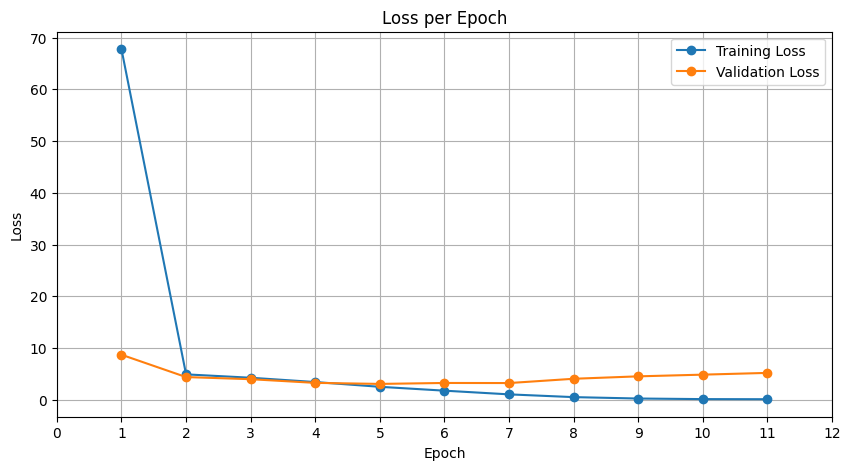

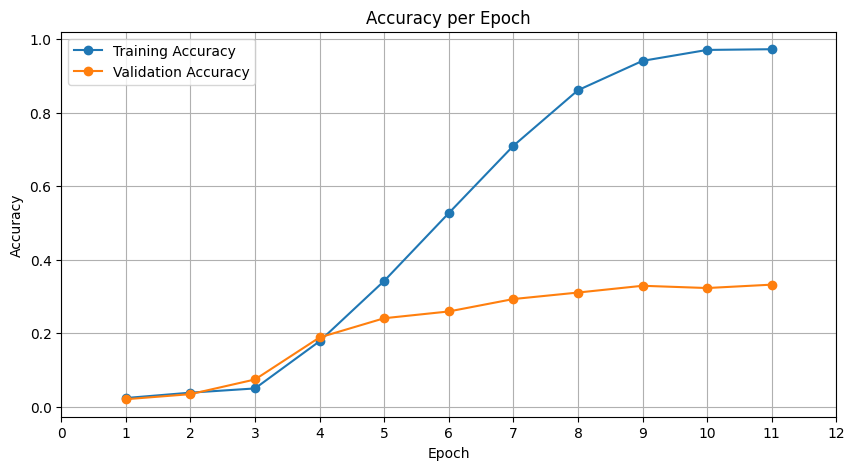

In [ ]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

## Model 6:

In [ ]:

net = NetCNN_6()

net

NetCNN_7(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=6400, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=82, bias=True)
)

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epoch_loss,\
epoch_val_loss,\
epoch_train_acc,\
epoch_val_acc = trainModelGPU(net=net,
                                      train_loader=train_loader,
                                      val_loader=val_loader,
                                      optimizer=optimizer,
                                      criterion=criterion)


Epoch 1
Epoch 1 Training Loss: 4.273, Validation Loss: 7.058
Epoch 1 Training Accuracy: 0.051, Validation Accuracy: 0.004
Epoch 2
Epoch 2 Training Loss: 4.292, Validation Loss: 3.862
Epoch 2 Training Accuracy: 0.045, Validation Accuracy: 0.104
Epoch 3
Epoch 3 Training Loss: 3.381, Validation Loss: 3.478
Epoch 3 Training Accuracy: 0.146, Validation Accuracy: 0.144
Epoch 4
Epoch 4 Training Loss: 2.916, Validation Loss: 3.096
Epoch 4 Training Accuracy: 0.233, Validation Accuracy: 0.219
Epoch 5
Epoch 5 Training Loss: 2.467, Validation Loss: 3.157
Epoch 5 Training Accuracy: 0.327, Validation Accuracy: 0.228
Epoch 6
Epoch 6 Training Loss: 2.166, Validation Loss: 2.888
Epoch 6 Training Accuracy: 0.400, Validation Accuracy: 0.269
Epoch 7
Epoch 7 Training Loss: 1.789, Validation Loss: 2.755
Epoch 7 Training Accuracy: 0.486, Validation Accuracy: 0.332
Epoch 8
Epoch 8 Training Loss: 1.362, Validation Loss: 2.944
Epoch 8 Training Accuracy: 0.598, Validation Accuracy: 0.324
Epoch 9
Epoch 9 Training

In [ ]:

plot_loss_per_epoch(epoch_loss, epoch_val_loss)
plot_accuracy_per_epoch(epoch_train_acc, epoch_val_acc)

# Task 2: